In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve,convolve2d
import math

In [2]:
vidcap = cv2.VideoCapture('video.mp4')
success,image = vidcap.read()
count = 0
while success:
   success,image = vidcap.read()
   if count%30==0 :
      cv2.imwrite(r"C:\Users\irava\OneDrive\Desktop\assignment-3\Imgs\frame%d.jpg" % count, image) # save frame as JPEG file 
      print('Read a new frame: ', success)
   count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


In [3]:
def ssd(A,B):
 squares = (A[:,:,:3] - B[:,:,:3]) ** 2
 return math.sqrt(np.sum(squares))

In [4]:
def norm_data(data):
 mean_data=np.mean(data)
 std_data=np.std(data, ddof=1)
 return (data-mean_data)/(std_data)
def ncc(data0, data1):
 return (1.0/(data0.size-1)) * np.sum(norm_data(data0)*norm_data(data1))


In [5]:
import cv2
imdir = r'Imgs/'
ext = ['png', 'jpg', 'gif','jpeg'] # Add image formats here
files = []
files.extend(glob.glob(imdir + '*.' + 'jpg'))
images = [cv2.imread(file) for file in files]
print(files)


['Imgs\\frame0.jpg', 'Imgs\\frame120.jpg', 'Imgs\\frame150.jpg', 'Imgs\\frame180.jpg', 'Imgs\\frame210.jpg', 'Imgs\\frame240.jpg', 'Imgs\\frame270.jpg', 'Imgs\\frame30.jpg', 'Imgs\\frame300.jpg', 'Imgs\\frame330.jpg', 'Imgs\\frame360.jpg', 'Imgs\\frame60.jpg', 'Imgs\\frame90.jpg']


(480, 640, 3)


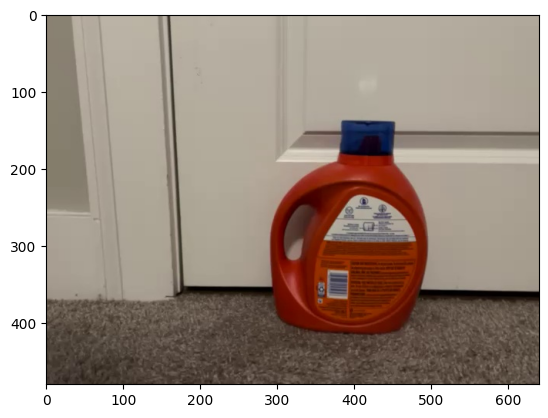

In [6]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
print(images[0].shape)

True

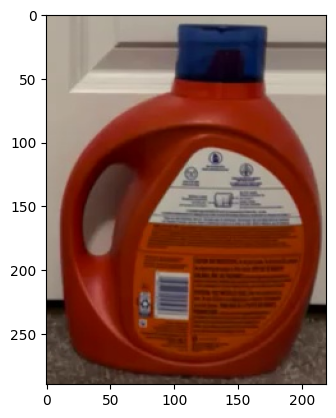

In [7]:
cropped_image = images[0][130:420,280:500]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
cv2.imwrite("Cropped Image.jpg", cropped_image)

In [8]:
d=dict()
d_norm=dict()
for i in range(0,190,20):
    for j in range(0,420,20):
        d[str(i)+":"+str(i+290),str(j)+":"+str(j+220)]=ssd(cropped_image,images[12][i:i+290,j:j+220])
        #d_norm[str(i)+":"+str(i290),str(j)+":"+str(j+220)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+290,j:j+220]))

In [9]:
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))


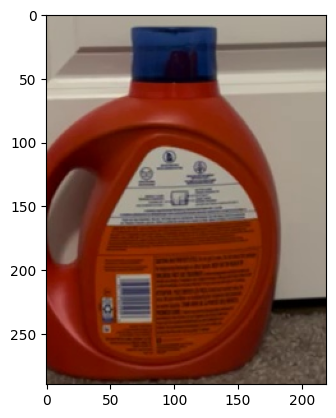

In [10]:

plt.imshow(cv2.cvtColor(images[1][y1:y2,x1:x2], cv2.COLOR_BGR2RGB))


In [11]:
color = (200, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(images[12], (x1,y1), (x2,y2), color, thickness)

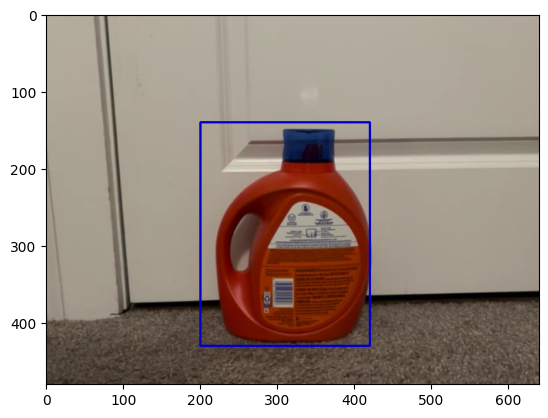

In [12]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [13]:
#motion tracking Q2
Iref=cv2.imread(r'C:\Users\irava\OneDrive\Desktop\assignment-3\Imgs\frame0.jpg',cv2.IMREAD_GRAYSCALE)
Inext=cv2.imread(r'C:\Users\irava\OneDrive\Desktop\assignment-3\Imgs\frame30.jpg',cv2.IMREAD_GRAYSCALE)
Iref=np.array(Iref).astype(np.float32)
Inext=np.array(Inext).astype(np.float32)
kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25
kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
kernel_t = np.array([[1., 1.], [1., 1.]])*.25
Iref = Iref / 255. # normalize pixels
Inext = Inext / 255. # normalize pixels
Ix=cv2.filter2D(Iref,-1,kernel=kernel_x)
Iy=cv2.filter2D(Iref,-1,kernel=kernel_y)
It=cv2.filter2D(Iref,-1,kernel=kernel_t)+cv2.filter2D(Inext,-1,kernel=kernel_x)
Ix,Iy,It=np.array(Ix),np.array(Iy),np.array(It)

In [14]:
u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))

C:\Users\irava\AppData\Local\Temp\ipykernel_42380\3143559099.py:1: RuntimeWarning: divide by zero encountered in divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))
C:\Users\irava\AppData\Local\Temp\ipykernel_42380\3143559099.py:1: RuntimeWarning: invalid value encountered in divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))


In [15]:
u

array([[      inf,       inf,       inf, ...,       inf,       inf,
              inf],
       [      inf,       inf,       inf, ...,       inf,       inf,
              inf],
       [      inf,       inf,       inf, ...,       inf,       inf,
              inf],
       ...,
       [47.16212 , 44.418137, 88.86001 , ..., 17.218586, 14.742618,
        20.57983 ],
       [44.271893, 41.74207 , 55.696983, ..., 17.118965, 46.103363,
        20.493984],
       [36.89711 , 35.846657, 35.24999 , ..., 16.333336, 25.063007,
        19.436506]], dtype=float32)

In [2]:
#Q3 dense optical flow
import cv2 as cv
import numpy as np


# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture(r"C:\Users\irava\OneDrive\Desktop\assignment-3\video.mp4")
ret, first_frame = cap.read()
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255

while(cap.isOpened()):

    ret, frame = cap.read()
    
    # Opens a new window and displays the input
    # frame
    cv.imshow("input.jpeg", frame)
    
    # Converts each frame to grayscale - we previously
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)

    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
    # Sets image hue according to the optical flow
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
    
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
    
    # Updates previous frame
    prev_gray = gray
    
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

In [1]:
#Q5-face detection
import os
import time
import cv2
import imutils
detectingPath = {
    
    "face": "face.xml",
    "smile": "smile.xml",
}

print("[INFO] loading haar cascades...")
detecting = dict()
 
for (name, path) in detectingPath.items():
    detecting[name] = cv2.CascadeClassifier(path)

print("[INFO] starting video stream...")
vs = cv2.VideoCapture(0)

while True:
    _,frm = vs.read()
    frm = imutils.resize(frm, width=500)
    gray = cv2.cvtColor(frm, cv2.COLOR_BGR2GRAY)

    faceRects = detecting["face"].detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE)

    for (fX, fY, fW, fH) in faceRects:
        faceROI = gray[fY:fY + fH, fX:fX + fW]
        smileRects = detecting["smile"].detectMultiScale(
            faceROI, scaleFactor=1.1, minNeighbors=10,
            minSize=(15, 15), flags=cv2.CASCADE_SCALE_IMAGE)
        for (sX, sY, sW, sH) in smileRects:
            ptA = (fX + sX, fY + sY)
            ptB = (fX + sX + sW, fY + sY + sH)
            cv2.rectangle(frm, ptA, ptB, (255, 0, 0), 2)
        cv2.rectangle(frm, (fX, fY), (fX + fW, fY + fH),
                      (0, 255, 0), 2)
    cv2.imshow("Frm", frm)
    if cv2.waitKey(1) == ord("q"):
        break

cv2.destroyAllWindows()

[INFO] loading haar cascades...
[INFO] starting video stream...


In [4]:
#Q-4
import cv2
import os


src = 'Objects'
sift = cv2.SIFT_create(nfeatures=1000)

imgs =[]
objs = []

myList = os.listdir(src)
print('Total classes detected ', len(myList))

for obj in myList:
    imgCur = cv2.imread(f'{src}/{obj}',0)
    imgs.append(imgCur)
    objs.append(os.path.splitext(obj)[0])
print(objs)

def objIdentifier(img, desList):
    kp2, des2 = sift.detectAndCompute(img, None)
    bf = cv2.BFMatcher()
    numMatch = []
    maxVal = -1
    try:
        for des1 in desList:
            matches = bf.knnMatch(des1, des2, k=2)
            #good ratio test
            good = []
            for m,n in matches:
                if m.distance < 0.75 * n.distance:
                    good.append([m])
            numMatch.append(len(good))
    except:
        pass

    if len(numMatch) != 0 :
        if max(numMatch) > 25:
            maxVal = numMatch.index(max(numMatch))
    return maxVal

def findDes(imgs):
    desList=[]
    for pic in imgs:
        kp,des = sift.detectAndCompute(pic,None)
        desList.append(des)
    return desList


desList = findDes(imgs)
print(len(desList))

cap = cv2.VideoCapture(0)

while True:

    _, frame = cap.read()
    frame_ = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    id = objIdentifier(frame_,desList)

    if id != -1:
        cv2.putText(frame, objs[id], (60,60), cv2.FONT_HERSHEY_PLAIN, 4, (0,255,0), 4)

    cv2.imshow("Video",frame)
    key = cv2.waitKey(5)
    if key == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Objects'

In [2]:
#Q-6
ul,vl=158,160 # from matlab ginput()
ur,vr=20,110
b=546.1 # distance between left and right cameras
f=1403.54736624058 #focallength
z=(b*f)/(ul-ur) #distance of object
print('The distance is '+str(z)+'mm')

The distance is 5554.182729738992mm
